<a href="https://colab.research.google.com/github/sharon-lin/ML-notebooks/blob/master/MIC_Workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIC Workshop 1: Intro to Deep Learning, Basics of PyTorch

## Background
Hope you're enjoying the first Deep Learning workshop so far! For these workshops, we'll typically use Google Colab, an online coding environment. This is so that we don't have to worry about installing all of the libraries on everyone's different computers. 

_____
You're now working in a Notebook. Notebooks have **cells**, each of which can be run by hitting Shift+Enter. Try it on the cell below!

_You will see the output of the particular cell right below it_

In [0]:
print("Notebooks are so much fun!!1!")

Notebooks are so much fun!!1!


In general, notebooks are a very suitable tool for machine learning/data science. We would also recommend trying [Jupyter Notebook](https://jupyter.org/install) if you haven't already

_For later workshops, we might opt out for a more involved environment like Docker in case we want to do anything fancier_
____
## Installing PyTorch
Don't worry too much about the contents of this cell. It basically just installs the right packages for you to run PyTorch code

If this cell is causing problems for you (like `tcmalloc`,  make sure you click "connect to Hosted runtime" from the dropdown menu in the top right)

In [1]:
# Installing pytorch, don't worry about the code in this cell. 
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = 'cpu' #cuda_output[0] if exists('/dev/nvidia0')

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

    100% |████████████████████████████████| 91.1MB 47.5MB/s 
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.


## Imports
PyTorch is really convenient because it has a lot of useful classes for us. Here are some examples:
* `torch.nn`: A neural network class
* `torch.autograd.Variable`: A placeholder for a Variable which will be automatically differentiable (this makes our life much easier)
* `torchvision.datasets`: Torch comes with preinstalled datasets so we don't need to handle them ourselves
* `torch.optim`: A class to hold the optimizers (such as SGD - Stochastic Gradient Descent)

In [0]:
import os
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import torchvision.datasets as dset
from torchvision import transforms

# The Data
For this lab, we will use one of the most (if not the most) popular datasets for machine learning - [MNIST](http://yann.lecun.com/exdb/mnist/). It is very accessible and is (was) used commonly used as a benchmark in academic literature. Because of its popularity, it's already in Torch, we just need to import it

You don't need to worry about the format too much now. But in general, getting the data in the necessary format is usually a key (albeit mundane) part of the process. 

In [3]:
## load mnist dataset

root = './data'
if not os.path.exists(root):
  os.mkdir(root)

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

0it [00:00, ?it/s]

9920512it [00:01, 8891257.17it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135024.18it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2443809.11it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 50887.86it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


We're going to make batches of size 100 for the purpose of training. Torch has `DataLoader` classes, which are used to load batches at a time in a (somewhat) optimized fashion

_Also, we're going to only make train and test datasets (no validation) to keep things simple today._

In [0]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [5]:
print ('total number of trainning batches: {}'.format(len(train_loader)))
print ('total number of testing batches: {}'.format(len(test_loader)))

total number of trainning batches: 600
total number of testing batches: 100


## Task 1

Print one of the images (handwritten digit) from `test_loader`. You can use 
```
plt.imshow(img)
```
for printing.

The `DataLoader` is an iterator, which iterates through the dataset (images and labels) in batches. The structure of each element from the loader should be:
`(batch_of_images, batch_of_labels)`
Each image in `batch_of_images` is 3 dimensional: `[channels, rows, columns]`. In MNIST, since the images are grayscale, there is only one channel, and you can access the contents of that channel by array indexing into the 0th entry.

This should help you with the next tasks.

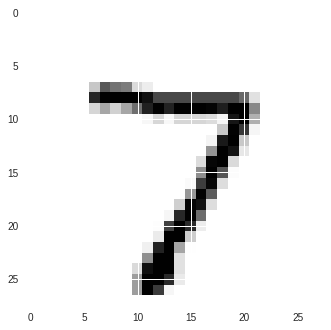

In [28]:
plt.imshow(test_loader.dataset[0][0][0])

Can you see now how the data is organized in `train_loader` and `test_loader`?

##Task 2

Now we're creating the layers of our neural network. There are plenty of parameters that we have to tune to make our model fit the data well. 

In addition to tunable parameters, there are also parameters that are determined by the data itself. In the following task, fill in the **input** and **output** dimensions in the cell below.

In [0]:
input_dim = 784
hidden_dim = 150 # feel free to change the value
output_dim = 10

## The Model
Below is a `ANNModel` class, which will use the parameters you just defined (such as the **input dimension**) in order to construct a neural network of the correct size. Read through the class to see if you can understand what each line is doing!

##Task 3

You are free to build the network as you wish. As a start, try to fill in the gaps. You might find the [documentation for pytorch.nn](https://pytorch.org/docs/stable/nn.html) helpful for the first blank.


In [0]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        self.fc3 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu(out)
                
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu(out)
        
        # Linear function 3
        out = self.fc3(out)
        return out

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

## The Loss Function
For this task, since we are doing classification, we will use Cross Entropy loss. It's the most common loss function for Classification tasks. You can read more about Cross Entropy Loss [here](https://en.wikipedia.org/wiki/Cross_entropy)

In [0]:
error = nn.CrossEntropyLoss()

## The Optimizer
For this task, we will use one of the simplest optimizers, Stochastic Gradient Descent (SGD). Here's the `PyTorch` code to setup our model with SGD.

In [0]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## The Training
The last step of our training pipeline is the training itself! For training, we have to choose hyperparameters like:
* `batch_size` (already defined)
* `num_epochs`: The number of laps through the data we should complete
* The loss function: What should the model optimize _for_?
* `optimizer`: How should the model change its parameters to minimze the loss?
* `learning_rate`: How big of steps should the model take when descending?

In [25]:
model = ANNModel(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
count = 0
num_epochs = 10
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, input_dim))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, input_dim))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 100 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, round(float(loss.data.item()), 4), accuracy))

Iteration: 100  Loss: 2.216  Accuracy: 38 %
Iteration: 200  Loss: 2.0108  Accuracy: 56 %


KeyboardInterrupt: ignored

##Task 4 (no coding)

Well-developed libraries like Tensorflow or PyTorch sometimes hide lots of the steps from you. Having an intuitive understanding of each step in the process is crucial for building correct and efficient machine learning models. 

Try to answer the following questions:


*   Why do we need the line $optimizer.zero\_grad()$?
*   What does $optimizer.step()$ do behind the curtains?
*   What is the line $predicted = torch.max(outputs.data, 1)[1]$ doing exactly? What are we taking max over?

Feel free to ask the lecturers or TAs for help. 


##Visualizing the accuracy of our model

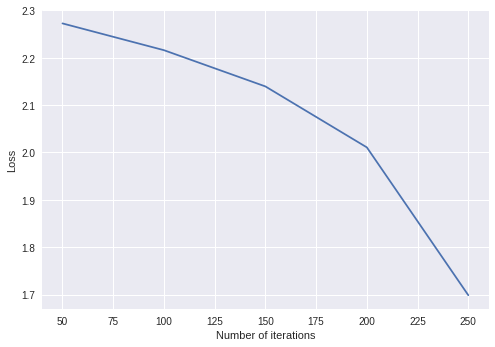

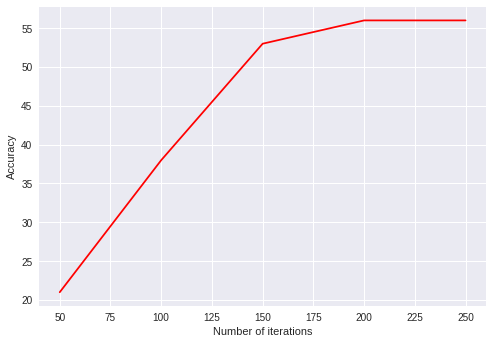

In [26]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.show()

## What's next?
We'll talk more about this kind of stuff next week, but setting up a neural network is usually only a small part of the work! Improving it is often the real challenge.

To improve the quality and accuracy of our model, we can (and should!) do any of the following things:

+ Change the training hyperparameters. This can include:
   * Make a Learning Rate Schedule (have the learning rate decrease over time to do more specific adjustments later)
   * Change the batch size (is bigger or smaller better?)
   * Use a new optimizer (next week)
+ Change the model architecture
   * Add more/less layers
   * Change the activation functions (next week!)
   * Change the number of nodes per layer
   * More epochs?
